In [25]:
#import modules 
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

First we write two simple functions that have as an input the coefficients of a polynomial and return (1) the coefficients of the derivative of a polynomial and (2) the value of a polynomial.

In [26]:
def Coefficients_of_derivative(c):
    # input c: array of coefficients of polynomial
    # output cc: array of coefficients of the derivative of the input polynomial

    n = len(c)
    cc = [0 for i in range (n-1)]
    for i in range (n-1):
        cc[i] = (i+1)*c[i+1]

    return cc

def EvalPoly(c,x0): 
    # input c: array of coefficients of polynomial
    # x0: evaluation point 
    # output y0: polynomial value P(x0)
 
    y0 = 0
    n = len(c)
    for i in range (n):
        y0 = y0 + c[i]*(x0**i)

    return y0

Assume we have a set of data points $\{ x_i, f_i \}$ either from a known function $f(x)$ or simply as a set of measurements. We wish to approximate the discrete data set by a continuous representation, so that we can take approximate derivatives up to a given order. Instead of fitting one polynomial through <i> all </i> data points, we consider a <i> small set </i> of data points in the neighborhood of a specified point $\xi$ where we wish to compute our derivative. We then fit an interpolating polynomial through this small set of points, differentiate this polynomial and evaluate the derivative at $\xi.$ We take this final value as the approximate derivative of our data set at $x=\xi.$ By looping through multiple values of $\xi$ we can compute an approximate derivative of our entire data set. 

More specifically, given a set of points $\{x_0, x_1,...,x_n\},$ an evaluation point $\xi,$ and an integer parameter $m$ which specifies the order of the derivative (e.g., $m=2$ for the second derivative), we wish to determine the weights $w_i$ such that 
$$
    f^{(m)}(\xi) = \left.\frac{d^m f}{d x^m}\right\vert_{\xi} \approx \sum_{i=0}^n w_i f_i,
$$
i.e., the $m$-th derivative of a function $f(x)$ at the point $\xi,$ expressed as a weighted sum of the function values $f_i = f(x_i).$ Using the three auxiliary routines above, determine the weight coefficients $\{ w_i \}_{i=0}^n.$

For simplicity, let us assume that the points $\{ x_i \}$ are equispaced, i.e., they can be described by $h \times \{0,1,2,...,n\}$ with $h$ as the grid spacing. Note that the parameter $n$ can be inferred from the length of the $x$-values we pass into the routine. Also, the weights we compute should be rendered independent of the parameter $h,$ i.e., we assume $h=1$ when computing the weights. For different spacings $h,$ we simply have to divide the computed weights by $h^m$ for the $m$-th derivative. 

Complete the function below to compute the weights $w$ for the $m$-th derivative evaluated at $\xi$ and given by function values at the locations $x.$ 

## Description of Procedure 

We will make use of the Lagrange basis functions, which we derive as described in the lectures. We then have 

$$
p_n(z) = \sum_{j=0}^n f_j l_j,
$$
where $\{ l_j(z) \}_{j=0}^n$ are the Largrange basis functions. We then make use of our functions from steps two and three to differentiate the basis polynomials m times and evaluate the differentiated polynomial at the point $\xi$.

In [28]:
def compFD(x,xi,m=1):      
    # input x: array of x-values for the interpolating polynomial
    #       xi: evaluation point for derivative 
    #       m: order of derivative (e.g. m=2 for second derivative)
    # output w: array of weight coefficients 

    n = len(x)
    
    # initialize the lagrange basis
    lagrange = np.zeros((n,n))      
    
    for i in range (n):
        # initialize the polynomial
        l = np.zeros(n)        
        l[0] = 1   
        for j in range (n):
            # multiplication occurs only if i and j are different
            if i != j:   
                # multiply by (x-x[j])/(x[i]-x[j])
                l = (l*(-x[j]) + np.roll(l,1))/(x[i]-x[j])      
        # Lagrange Basis
        lagrange[i] = l
    
    # initialize the weights
    w = np.zeros(n)
    
    for i in range(n):
        f = lagrange[i]        
        
        # differentiate m times
        for j in range(m):      
            f = Coefficients_of_derivative(f) 
        
        # evaluate at point xi
        w[i] = EvalPoly(f,xi)   
    
    return w

Use the schemes from the finite-difference routine <b> compFD(x,xi,m) </b> for $x = \{-1,0,1\}$ and $\xi = 0$ to solve the ordinary differential equation 

$$
x^2 y^{\prime\prime} + x y^\prime + (x^2 - \nu^2)y = 0 \qquad \qquad y(0) = 0, \ y(20) = 1, \quad x \in [0,20] 
$$
for $\nu = 1,2,3,4,5,6,7.$ 

The unknown function $y(x)$ will be represented on an equispaced grid with $n$ points ($n$ as a user-specified parameter). Use the finite-difference weights to express the second and first derivatives in terms of the unknown function values at the grid points. Recast the ordinary differential equation into a linear system and solve for the solution $y(x)$ on the grid points. 

Visualize your results for $\nu = 1,2,...,7.$ 

## Description of Procedure

We want to find the solution of the ODE in the interval $x \in [0,20]$, so first, we will denote $x$ to be the a list containing $n$ equispaced points between $0$ and $20$. We then compute the weights from the $\textbf{compFD}$ function in step $4$ to approximate the function and its first and second derivatives. So we have

$$
y'' = \frac{w_{2,0}y_{i-1} + w_{2,1}y_i + w_{2,2}y_{i+1}}{h^2}
$$

$$
y' = \frac{w_{1,0}y_{i-1} + w_{1,1}y_i + w_{1,2}y_{i+1}}{h}
$$

$$
y = w_{0,0}y_{i-1} + w_{0,1}y_i + w_{0,2}y_{i+1} \quad \text{this case is trivial with } w_{0,0} = 0 = w_{0,2}, w_{0,1} = 1
$$

for each $i \in [1,n-1]$, where we have divided the solution $y$ as a grid with $n$ points and $w_{2,0}$ represents the first weigth of the second derivative, $w_{1,0}$ the first weight of the first derivative and so on. Therefore, our ODE can be rewritten as 

$$
x_i^2\bigg(\frac{w_{2,0}y_{i-1} + w_{2,1}y_i + w_{2,2}y_{i+1}}{h^2}\bigg) + x_i\bigg(\frac{w_{1,0}y_{i-1} + w_{1,1}y_i + w_{1,2}y_{i+1}}{h}\bigg) + (x_i^2 - \nu^2)(w_{0,0}y_{i-1} + w_{0,1}y_i + w_{0,2}y_{i+1}) = 0.
$$

Rearranging, we get

$$
y_{i-1} \bigg( x_i^2 \frac{w_{2,0}}{h^2} + x_i\frac{w_{1,0}}{h} + (x_i^2 - \nu^2)w_{0,0}\bigg) + y_{i} \bigg( x_i^2 \frac{w_{2,1}}{h^2} + x_i\frac{w_{1,1}}{h} + (x_i^2 - \nu^2)w_{0,1}\bigg) + y_{i+1} \bigg( x_i^2 \frac{w_{2,2}}{h^2} + x_i\frac{w_{1,2}}{h} + (x_i^2 - \nu^2)w_{0,2}\bigg) = 0.
$$

For simplicity, we will denote 

$$
\alpha := x_i^2 \frac{w_{2,0}}{h^2} + x_i\frac{w_{1,0}}{h} + (x_i^2 - \nu^2)w_{0,0}
$$

$$
\beta := x_i^2 \frac{w_{2,1}}{h^2} + x_i\frac{w_{1,1}}{h} + (x_i^2 - \nu^2)w_{0,1}
$$

$$
\gamma:= x_i^2 \frac{w_{2,2}}{h^2} + x_i\frac{w_{1,2}}{h} + (x_i^2 - \nu^2)w_{0,2}
$$

In matrix form, we have

$$
\begin{pmatrix}
1 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0\\
\alpha & \beta & \gamma & 0 & \cdots & 0 & 0 & 0 & 0\\
0 & \alpha & \beta & \gamma & \cdots & 0 &0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & 0 & \cdots & 0 & \alpha & \beta & \gamma \\
0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 1\\
\end{pmatrix}
\begin{pmatrix}
y_0\\
y_1\\
y_2\\
\vdots\\
y_{n-1}\\
y_n\\
\end{pmatrix}
=
\begin{pmatrix}
0\\
0\\
0\\
\vdots\\
0\\
1\\
\end{pmatrix},
$$

where on row $i$ we have the $i-$th value of the vector $x$ and the first and last rows represent the boundary conditions of the ODE. Note that the $\alpha, \beta, \gamma$ are different on each row.

Thus we have acquired a linear system of the form

$$
A\textbf{x} = \textbf{b}.
$$
Here we could apply some of the methods we learnt for solving this system such as making a QR decomposition for the matrix $A$, however since our matrix contains elements only on the diagonal and the two off-diagonals and zeros everywhere else, computing its inverse will not take a long time. Hence our solution is 

$$
\textbf{y} = A^{-1} \textbf{b}.
$$

In [29]:
def BVP_ODE(n,nu):
    # input n: number of (equispaced) grid points on the interval [0,20]
    #       nu: value for parameter nu 
    # output x: array of grid values x
    #        y: array of function values y on the grid x 

    #create the vector x as n equispaced points in the interval [0,20]
    x = np.linspace(0,20,n)
    
    #compute the weights for the function and its first and second derivatives
    zero_der_weights = compFD([-1,0,1],0,0) 
    first_der_weights = compFD([-1,0,1],0,1)/(20/(n-1)) #divide by h^m to accustom for different spacings (h = 20/(n-1))
    second_der_weights = compFD([-1,0,1],0,2)/((20/(n-1))**2) #here m=2
    
    #initialize the matrix with zeros
    matrix = np.zeros((n,n))
    
    #input the first and last row
    matrix[0][0] = 1
    matrix[n-1][n-1] = 1
    
    #input the rest of the rows as described above
    for i in range (1,n-1):
        matrix[i][i-1] = second_der_weights[0]*(x[i]**2)+first_der_weights[0]*x[i] + zero_der_weights[0]*(x[i]**2 - nu**2)
        matrix[i][i] = second_der_weights[1]*(x[i]**2)+first_der_weights[1]*x[i] + zero_der_weights[1]*(x[i]**2 - nu**2)
        matrix[i][i+1] = second_der_weights[2]*(x[i]**2)+first_der_weights[2]*x[i] + zero_der_weights[2]*(x[i]**2 - nu**2)
        
    #create the vector b with 1 on the last row denoting the boundary condition y(20) = 1
    b = [0 for x in x]
    b[n-1] = 1
    
    #calculate y
    y = np.linalg.inv(matrix)@b
    return x,y

## Visualisation

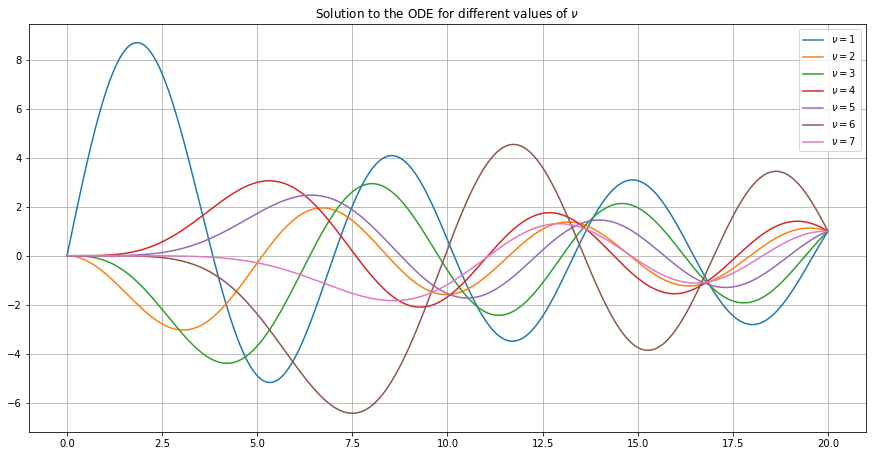

In [30]:
#plot the solution to the ODE for v = 1,2,3,4,5,6,7 with n = 1000
plt.figure(figsize = (15,7.5))
n = 1000
for nu in range(1,8):
    x,y = BVP_ODE(n,nu)
    plt.plot(x,y, label = r"$\nu =${}".format(nu))
    
plt.title(r"Solution to the ODE for different values of $\nu$")
plt.grid()
plt.legend()
plt.show()